# **Utils**

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def imShow(title: str = "",
           image: np.ndarray = None,
           subplot: bool = False,
           row: int = 0, col: int = 0, num: int = 0) -> None:

    if subplot:
        plt.subplot(row, col, num)
        plt.imshow(image, cmap="gray")
        plt.title(title)
        plt.axis('off')
    else:
        plt.imshow(image, cmap="gray")
        plt.title(title)
        plt.axis('off')
        plt.show()


# **Exp 1**

## **Reading Image**

Image


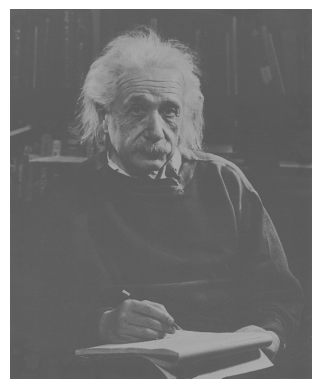

In [ ]:
# Reading an Image
print("Image")
img = cv2.imread("/content/drive/MyDrive/dip_Images/Fig0354(a)(einstein_orig).tif")
plt.imshow(img)
plt.axis("off")
plt.show()

## **Resizeing Image**

Before


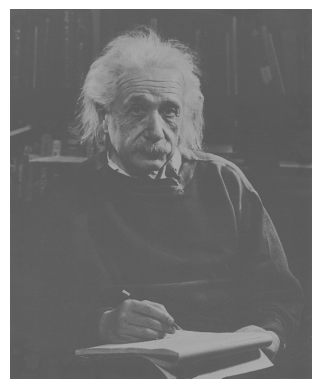

After


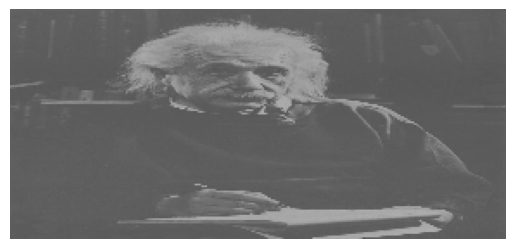

In [ ]:
# Resizing an Image

print("Before")
plt.imshow(img)
plt.axis("off")
plt.show()
print("After")
img_resize = cv2.resize(img,(287,133))
plt.imshow(img_resize)
plt.axis("off")
plt.show()

## **Rotate Image**

Rotated 180


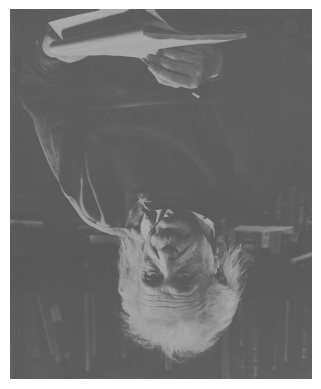

In [ ]:
# Rotating an Image
img_rotate = cv2.rotate(img, cv2.ROTATE_180)
print("Rotated 180")
plt.imshow(img_rotate)
plt.axis("off")
plt.show()

## **Adding two Images**

IMG1


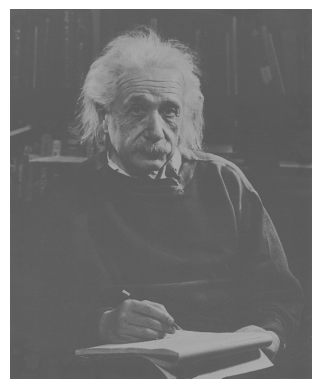

IMG2


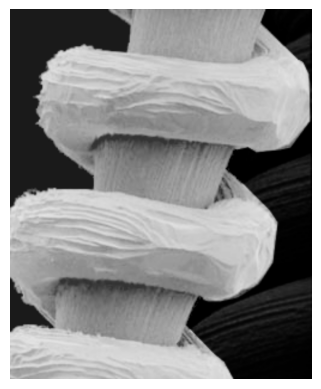

IMG1+IMG2


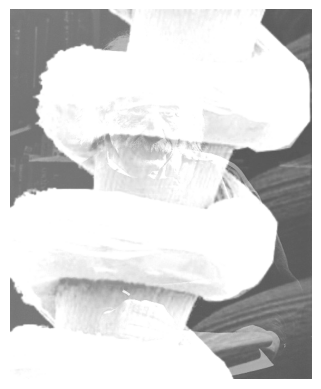

In [ ]:
# Adding two Images

img2 = cv2.imread("/content/drive/MyDrive/dip_Images/Fig0327(a)(tungsten_original).tif")
img2 = cv2.resize(img2, (img.shape[1], img.shape[0]))
img_add = cv2.add(img, img2)
print("IMG1")
plt.imshow(img)
plt.axis("off")
plt.show()
print("IMG2")
plt.imshow(img2)
plt.axis("off")
plt.show()
print("IMG1+IMG2")
plt.imshow(img_add)
plt.axis("off")
plt.show()

## **Plotting Histogram of Channels**

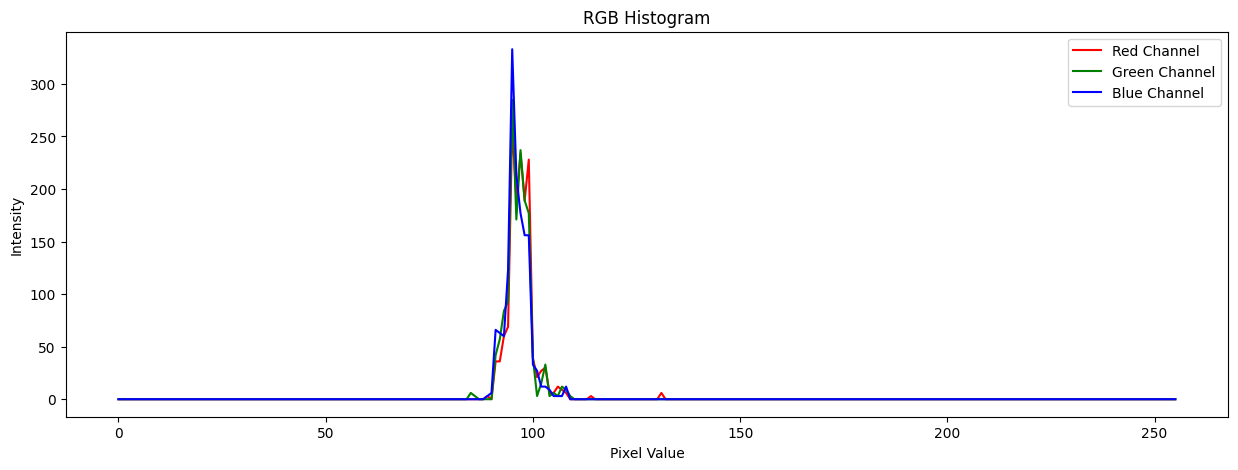

In [ ]:
# Get Histogram for color channels
r_hist = cv2.calcHist(img, channels=[0], mask=None, histSize=[256], ranges=[0, 256])
g_hist = cv2.calcHist(img, channels=[1], mask=None, histSize=[256], ranges=[0, 256])
b_hist = cv2.calcHist(img, channels=[2], mask=None, histSize=[256], ranges=[0, 256])

plt.figure(figsize=(15,5))
plt.plot(r_hist, color='red', label='Red Channel')
plt.plot(g_hist, color='green', label='Green Channel')
plt.plot(b_hist, color='blue', label='Blue Channel')

plt.xlabel('Pixel Value')
plt.ylabel('Intensity')
plt.title('RGB Histogram')
plt.legend()

plt.show()

BW Image


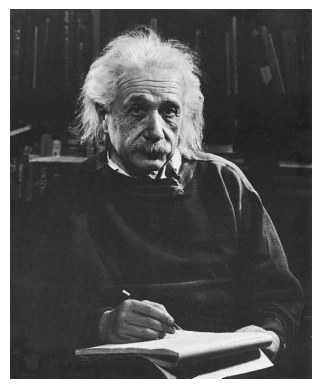

HLS Image


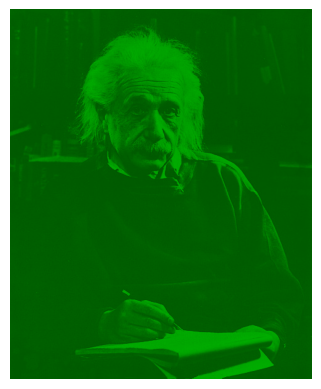

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print("BW Image")
plt.imshow(img_gray, cmap="gray")
plt.axis("off")
plt.show()
print("HLS Image")
img_HLS = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
plt.imshow(img_HLS, cmap="gray")
plt.axis("off")
plt.show()

## **Different Thresholding Methods in CV2**

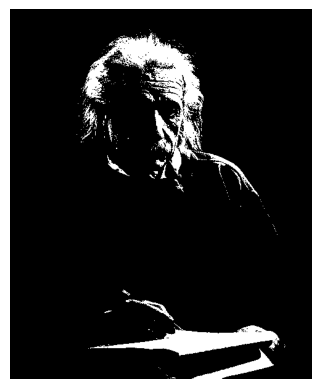

In [ ]:
_, img_thres = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY)
plt.imshow(img_thres)
plt.axis("off")
plt.show()

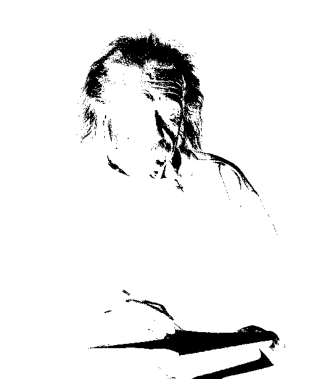

In [ ]:
_, img_thres = cv2.threshold(img, 150, 255, cv2.THRESH_BINARY_INV)
plt.imshow(img_thres)
plt.axis("off")
plt.show()

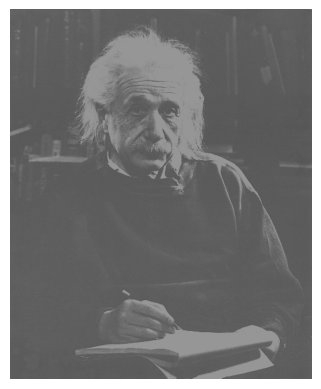

In [ ]:
_, img_thres = cv2.threshold(img, 150, 255, cv2.THRESH_TRUNC)
plt.imshow(img_thres)
plt.axis("off")
plt.show()

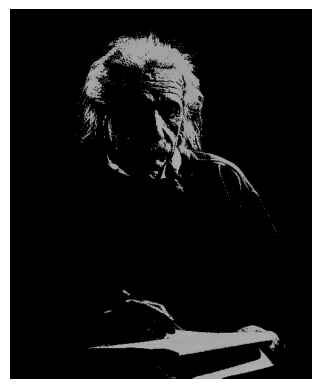

In [ ]:
_, img_thres = cv2.threshold(img, 150, 255, cv2.THRESH_TOZERO)
plt.imshow(img_thres)
plt.axis("off")
plt.show()

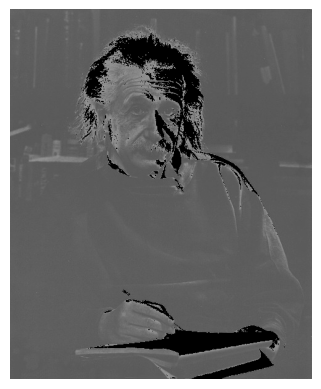

In [ ]:
_, img_thres = cv2.threshold(img, 150, 255, cv2.THRESH_TOZERO_INV)
plt.imshow(img_thres)
plt.axis("off")
plt.show()

Before


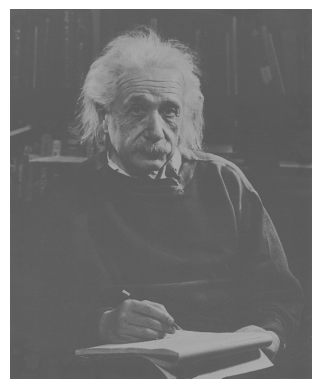


After


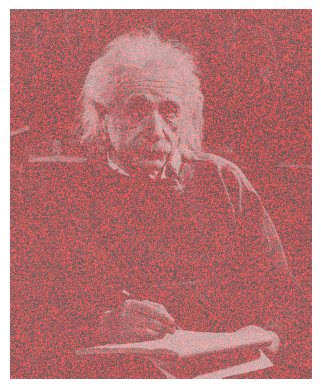

In [ ]:
print("Before")
plt.imshow(img)
plt.axis("off")
plt.show()
print()
noise = np.zeros_like(img, dtype=np.float32)
cv2.randn(noise, 0, 10)
noisy_img = cv2.add(img, noise.astype(np.uint8))
print("After")
plt.imshow(noisy_img)
plt.axis("off")
plt.show()

# **Exp 2**

## **Image Negative**

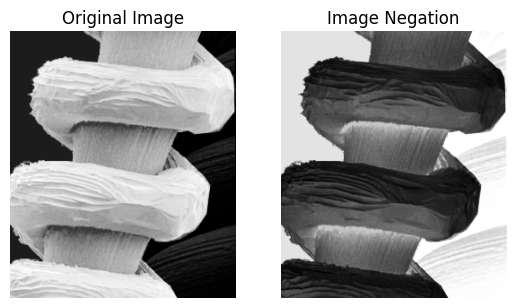

In [ ]:
# Image Negative
img = cv2.imread("/content/drive/MyDrive/dip_Images/Fig0327(a)(tungsten_original).tif",cv2.COLOR_BGR2GRAY)
imShow("Original Image",img, subplot=True, row=1, col=2, num=1)
img_negative = 255 - img
imShow("Image Negation",img_negative, subplot=True, row=1, col=2, num=2)

## **Logarithmic Transform**

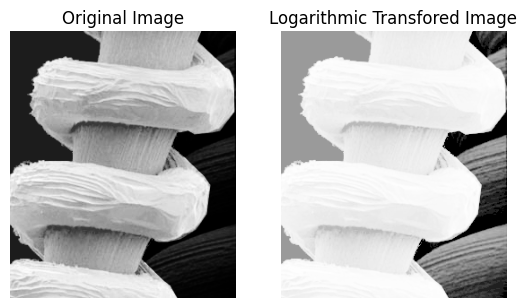

In [ ]:
c = 255 / np.log(1 + np.max(np.array(img)))
img_log = np.round(c * np.log(1 + np.array(img)))
imShow("Original Image", img, subplot=True, row=1, col=2, num=1)
imShow("Logarithmic Transfored Image", img_log, subplot=True, row=1, col=2, num=2)

## **Power Law Transform**

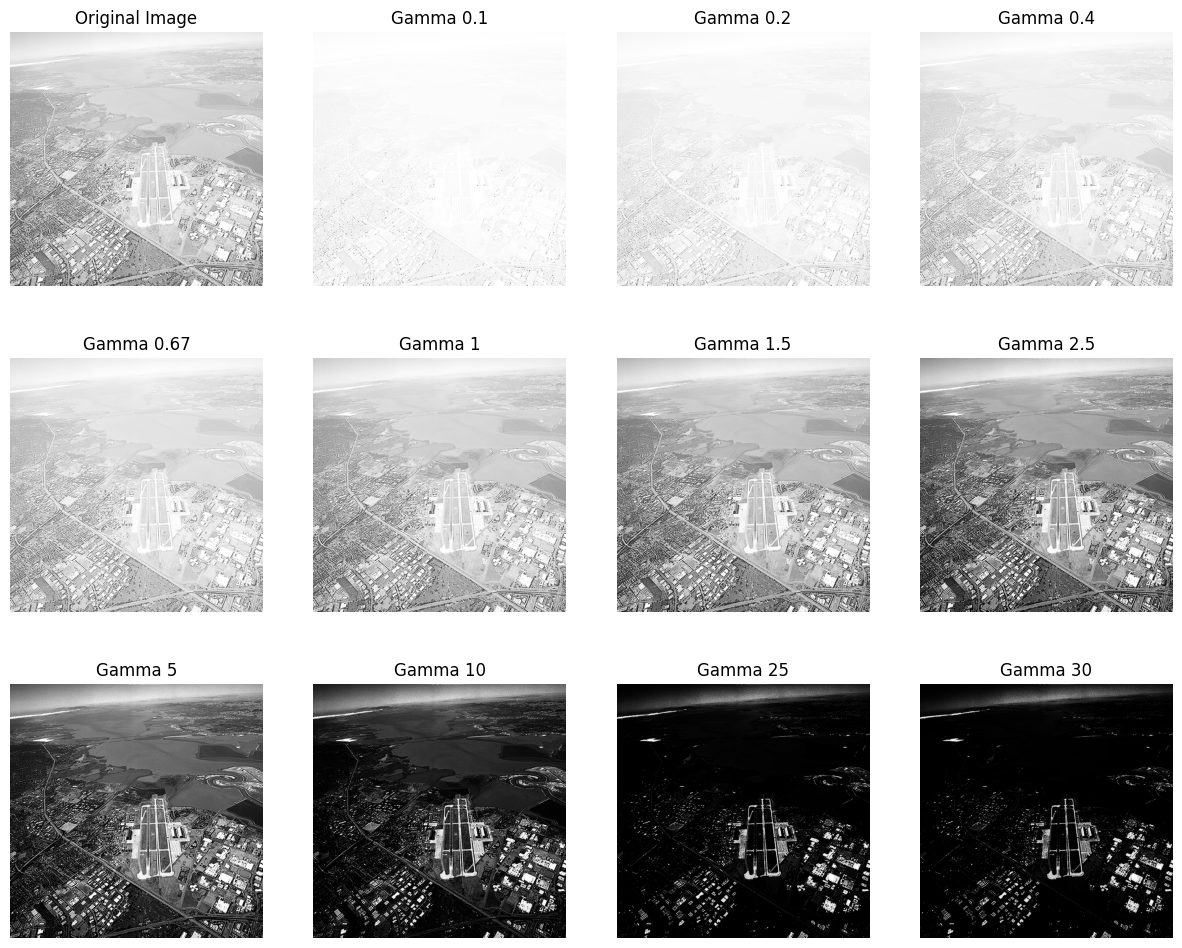

In [ ]:
img_light = cv2.imread("/content/drive/MyDrive/dip_Images/Fig0309(a)(washed_out_aerial_image).tif",cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(15,12))
gammas = [0.04, 0.1, 0.2, 0.4, 0.67, 1 , 1.5, 2.5, 5, 10, 25, 30]
img_no = 1
for gamma in gammas:
    img_pl = 255*(img_light/255)**gamma
    if img_no == 1:
        imShow("Original Image",img_light, subplot=True, row=3, col=4, num=1)
    else:
        imShow(f"Gamma {gamma}",img_pl, subplot=True, row=3, col=4, num=img_no)
    img_no += 1


## **Flipping Image**

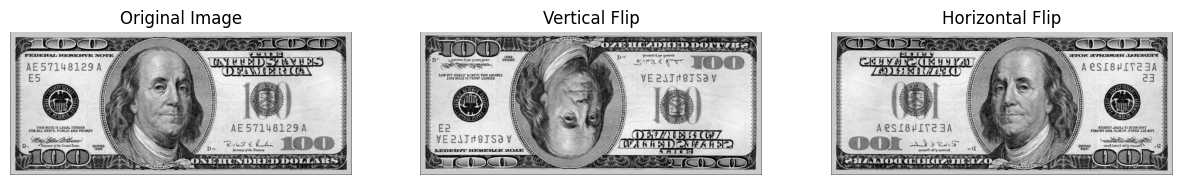

In [ ]:
plt.figure(figsize=(15,12))
img_dollar = cv2.imread("/content/drive/MyDrive/dip_Images/Fig0314(a)(100-dollars).tif",cv2.COLOR_BGR2GRAY)
imShow("Original Image",img_dollar, subplot=True, row=1, col=3, num=1)

img_flip_v = cv2.flip(img_dollar, 0)
imShow("Vertical Flip",img_flip_v, subplot=True, row=1, col=3, num=2)

img_flip_h = cv2.flip(img_dollar, 1)
imShow("Horizontal Flip",img_flip_h, subplot=True, row=1, col=3, num=3)

# **Exp 3**

## **Gray Level Slicing**

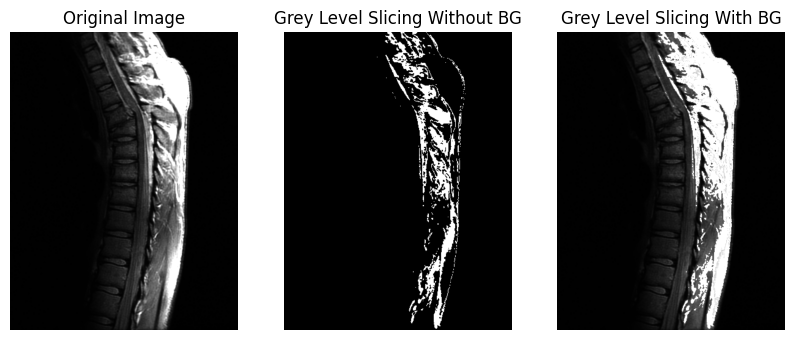

In [ ]:
def gray_level_slicing(path, lower, upper, bg = False, THRESHOLD = 256):
    image = cv2.imread(path,cv2.COLOR_BGR2GRAY)
    rows, cols = image.shape
    for row in range(rows):
        for col in range(cols):
            if lower <= image[row][col] <= upper:
                image[row][col] = THRESHOLD-1
            else:
                if bg:
                    pass
                else:
                    image[row][col] = 0
    return image

plt.figure(figsize=(10,5))
path = "/content/drive/MyDrive/dip_Images/Fig0308(a)(fractured_spine).tif"
img_sliced_nbg = gray_level_slicing(path, 100, 200)
img_sliced_bg = gray_level_slicing(path, 100, 200, bg = True)
img = cv2.imread(path, cv2.COLOR_BGR2GRAY)
imShow("Original Image", img, subplot=True, row=1, col=3, num=1)
imShow("Grey Level Slicing Without BG", img_sliced_nbg, subplot=True, row=1, col=3, num=2)
imShow("Grey Level Slicing With BG", img_sliced_bg, subplot=True, row=1, col=3, num=3)

## **Bit Plane Slicing**

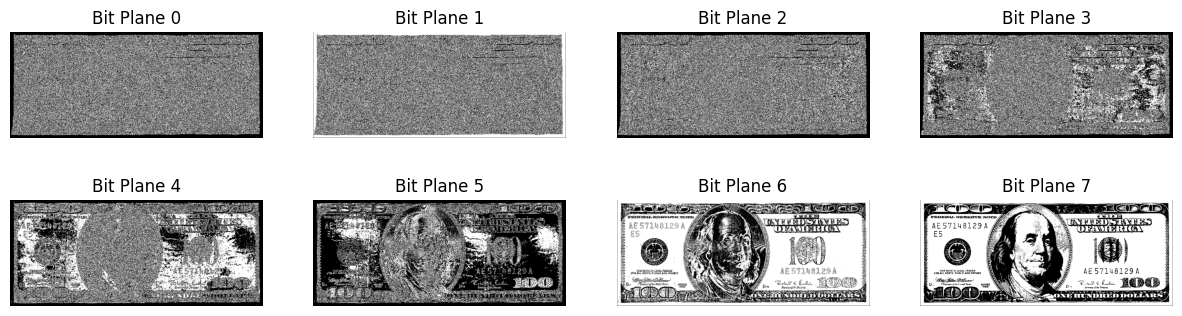

In [ ]:
def bit_plane_slicing(path):
    for bit in range(8):
        img = cv2.imread(path,0)
        plane=np.zeros_like(img)
        plane[img&(1<<bit)!=0]=255
        imShow(f"Bit Plane {bit}", plane, subplot=True, row = 2, col = 4, num=bit+1)
plt.figure(figsize=(15,4))
bit_plane_slicing(path="/content/drive/MyDrive/dip_Images/Fig0314(a)(100-dollars).tif")

## **Contrast Stretching**

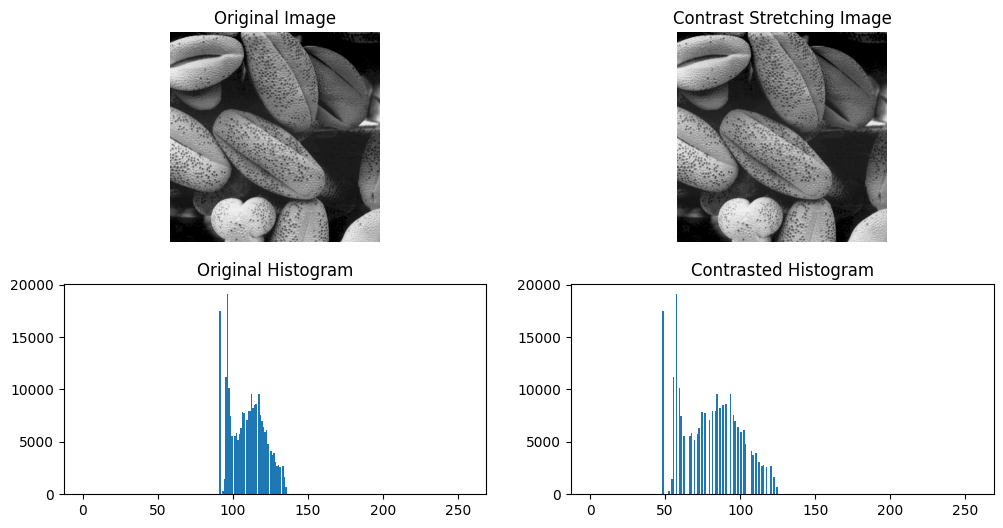

In [ ]:
def contrast_stretching(path=None, s1=30, s2 = 150, r1=80, r2=150, L=255):
    img = cv2.imread(path,cv2.COLOR_BGR2GRAY)
    imShow("Original Image", img, subplot=True, row = 2, col = 2, num=1)
    plt.subplot(2,2,3)
    plt.title("Original Histogram")
    plt.hist(img.ravel(), 256, [0,256])

    a = s1/r1
    b = (s2-s1)/(r2-r1)
    g = (L-s2)/(L-r2)

    rows, cols = img.shape
    for row in range(rows):
        for col in range(cols):
            if img[row][col] <= r1:
                img[row][col] = a*img[row][col]
            elif img[row][col] >r1 and img[row][col] <=r2:
                r = img[row][col]
                img[row][col] = b*(r-r1) + s1
            else:
                r = img[row][col]
                img[row][col] = g*(r-r2) + s2
    imShow("Contrast Stretching Image", img, subplot=True, row = 2, col = 2, num=2)
    plt.subplot(2,2,4)
    plt.title("Contrasted Histogram")
    plt.hist(img.ravel(),256,[0,256])
plt.figure(figsize=(12,6))
path = "/content/drive/MyDrive/dip_Images/Fig0316(2)(2nd_from_top).tif"
contrast_stretching(path = path)

# **Exp 4**

## **Plotting Histogram of all types of Images**

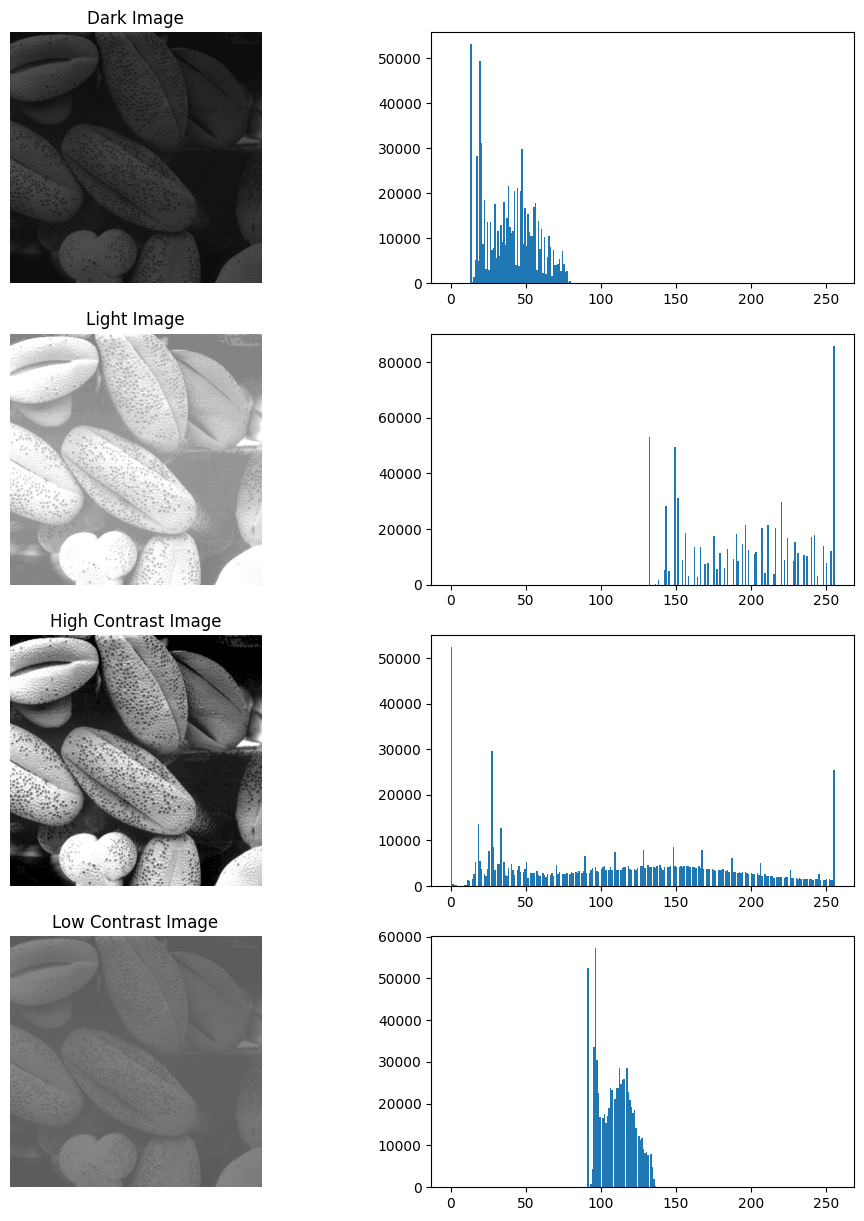

In [ ]:
plt.figure(figsize=(12,15))

image_paths = [
    "/content/drive/MyDrive/dip_Images/Fig0320(4)(bottom_left).tif",     # Dark img
    "/content/drive/MyDrive/dip_Images/Fig0320(1)(top_left).tif",        # Light img
    "/content/drive/MyDrive/dip_Images/Fig0316(3)(third_from_top).tif",  # High contrast img
    "/content/drive/MyDrive/dip_Images/Fig0316(2)(2nd_from_top).tif"     # low contrast img
]

img_type = [
    "Dark Image",
    "Light Image",
    "High Contrast Image",
    "Low Contrast Image"
]

subplot_count = 0
for index in range(len(image_paths)):
    img = cv2.imread(image_paths[index], 1)
    imShow(title=img_type[index], image= img, subplot=True, row=4,col=2,num=2*index+1)
    plt.subplot(4,2,2*index+2)
    plt.hist(img.ravel(),256,[0,256])
plt.show()

## **Histogram Equilization**

### **Method I**

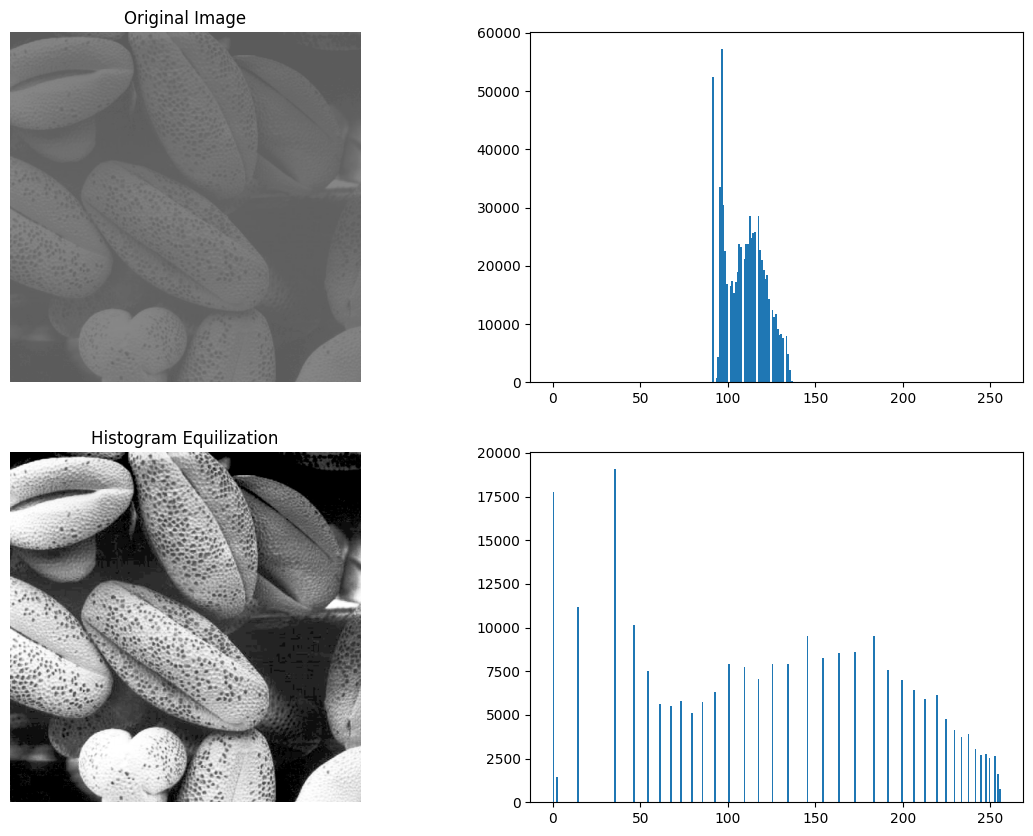

In [ ]:
def Histogram_Equilization(path:str):
    plt.figure(figsize=(14,10))
    img = cv2.imread(path,1)
    imShow("Original Image", img, subplot=True, row=2, col=2, num=1)
    plt.subplot(2,2,2)
    plt.hist(img.ravel(),256,[0,256])
    img = cv2.imread(path,0) # Reading again in zero mode to avoid an error of CV_8UC1
    img = cv2.equalizeHist(img)
    imShow("Histogram Equilization", img, row=2, col=2, num=3, subplot=True)
    plt.subplot(2,2,4)
    plt.hist(img.ravel(),256,[0,256])

Histogram_Equilization("/content/drive/MyDrive/dip_Images/Fig0316(2)(2nd_from_top).tif")
plt.show()

### **Method II**

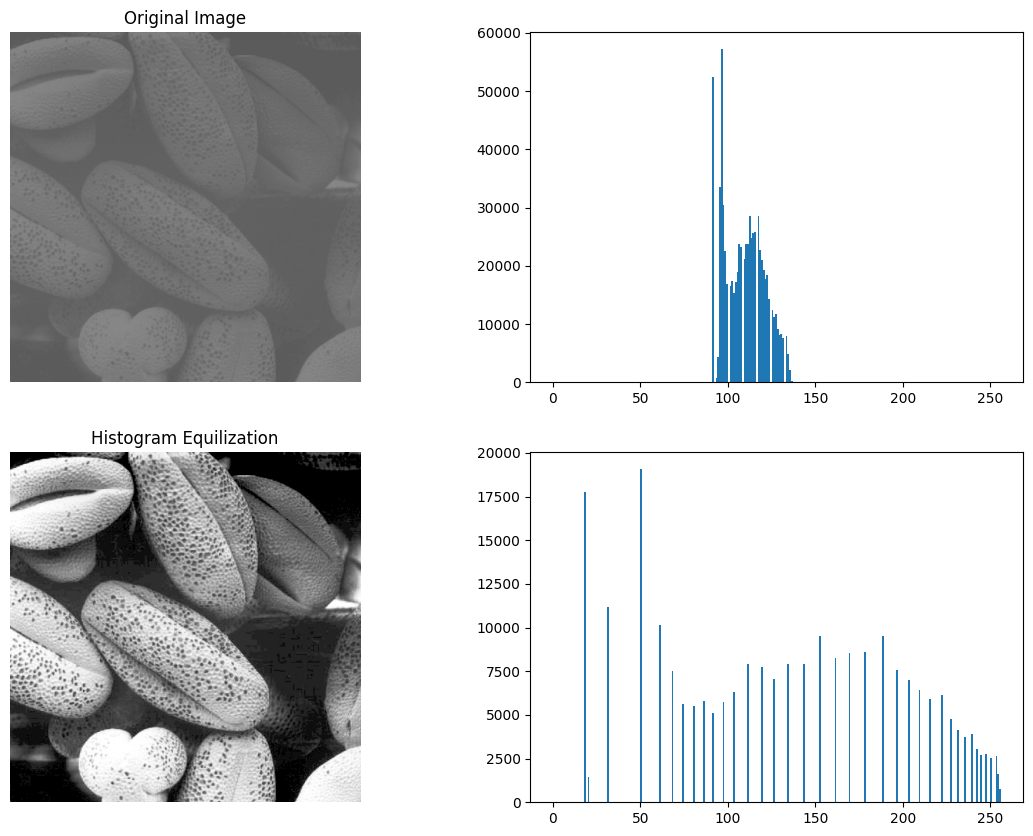

In [ ]:
import pandas as pd

def histogramEquilization(img):

    img1 = np.copy(img)
    freq = {}
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            r = img[row][col]
            if r in freq:
                freq[r] += 1
            else:
                freq[r] = 1

    for i in range(256):
        if i not in freq:
            freq[i] = 0
    data = {
        "GrayLevel":list(freq.keys()),
        "Nk":list(freq.values())
    }

    df = pd.DataFrame(data)
    df = df.sort_values(by="GrayLevel")
    df.reset_index(inplace=True, drop=True)
    df["PDF"] = df["Nk"]/(img.shape[0]*img.shape[1])
    df["CDF"] = df["PDF"].cumsum()
    df["Sk"] = df["CDF"]*255
    df["New_Histogram"] = df["Sk"].apply(lambda x:round(x))
    grouped_df = df[['New_Histogram', 'Nk']].groupby('New_Histogram').sum().reset_index()
    for row in range(img.shape[0]):
        for col in range(img.shape[1]):
            r = img[row][col]
            img1[row][col] = df.loc[r,"New_Histogram"]

    return df, img1, grouped_df

plt.figure(figsize=(14,10))
img = cv2.imread("/content/drive/MyDrive/dip_Images/Fig0316(2)(2nd_from_top).tif", 1)

imShow("Original Image", img, subplot=True, row=2, col=2, num=1)
plt.subplot(2,2,2)
plt.hist(img.ravel(),256,[0,256])
img = cv2.imread("/content/drive/MyDrive/dip_Images/Fig0316(2)(2nd_from_top).tif", 0)
df, eq_img, grouped_df = histogramEquilization(img)
imShow("Histogram Equilization", eq_img, row=2, col=2, num=3, subplot=True)
plt.subplot(2,2,4)
plt.hist(eq_img.ravel(),256,[0,256])
plt.show()

In [ ]:
df

GrayLevel  Nk  PDF  CDF     Sk  New_Histogram
0            0   0  0.0  0.0    0.0              0
1            1   0  0.0  0.0    0.0              0
2            2   0  0.0  0.0    0.0              0
3            3   0  0.0  0.0    0.0              0
4            4   0  0.0  0.0    0.0              0
..         ...  ..  ...  ...    ...            ...
251        251   0  0.0  1.0  255.0            255
252        252   0  0.0  1.0  255.0            255
253        253   0  0.0  1.0  255.0            255
254        254   0  0.0  1.0  255.0            255
255        255   0  0.0  1.0  255.0            255

[256 rows x 6 columns]

In [ ]:
grouped_df

New_Histogram     Nk
0               0      0
1              18  17765
2              20   1427
3              31  11200
4              50  19078
5              61  10121
6              68   7494
7              74   5604
8              80   5523
9              86   5816
10             91   5131
11             97   5711
12            103   6306
13            111   7888
14            119   7767
15            126   7053
16            134   7934
17            143   7913
18            152   9535
19            161   8271
20            169   8524
21            178   8624
22            188   9526
23            196   7593
24            203   7002
25            209   6438
26            215   5932
27            222   6158
28            227   4759
29            231   4123
30            235   3746
31            239   3896
32            242   3039
33            244   2705
34            247   2781
35            250   2555
36            253   2655
37            254   1638
38            255    769

# **Exp 5**

## **Box Filter**

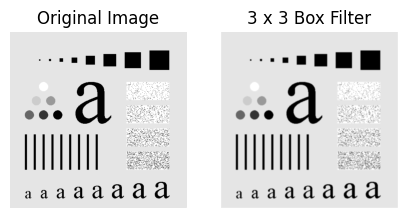

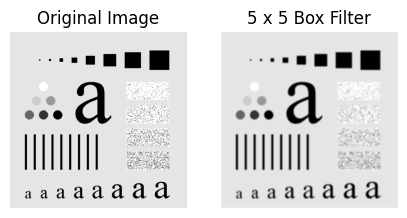

In [ ]:
img = cv2.imread("/content/drive/MyDrive/dip_Images/Fig0333(a)(test_pattern_blurring_orig).tif", 0)

def box_filter(filter_size, img, CONSTANT=255):
    rows, cols = img.shape
    img1 = np.pad(img, pad_width=int(np.floor(filter_size/2)), mode='constant', constant_values=CONSTANT)
    filtered_img = np.zeros_like(img)
    for row in range(rows):
        for col in range(cols):
            replace = np.round(np.sum(img1[row:row+filter_size, col:col+filter_size])/(filter_size*filter_size))
            filtered_img[row,col]=  replace

    plt.figure(figsize=(5, 3))
    imShow("Original Image",img, subplot=True, row=1,col=2, num=1)
    imShow(f"{filter_size} x {filter_size} Box Filter",filtered_img,subplot=True, row=1,col=2, num=2)
    plt.show()

# 3 x 3 Filter
box_filter(3,img)
# 5 x 5 Filter
box_filter(5,img)

## **Weighted Filter**

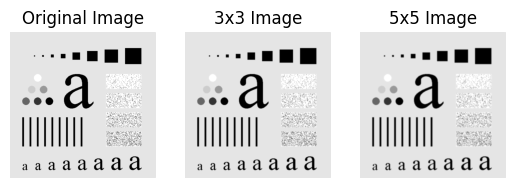

In [ ]:
def weighted_filter(filter, img):
    if filter == 3:
        kernel = np.array([[1,2,1],
                           [2,4,2],
                           [1,2,1]]) / 16
    elif filter == 5:
        kernel = np.array([[1, 4, 6, 4, 1],
                           [4,16,24,16, 4],
                           [6,24,36,24, 6],
                           [4,16,24,16, 4],
                           [1, 4, 6, 4, 1]]) / 256
    img = cv2.filter2D(img,-1,kernel)
    return img
img = cv2.imread("/content/drive/MyDrive/dip_Images/Fig0333(a)(test_pattern_blurring_orig).tif", 0)
imShow("Original Image", img, subplot=True, row=1, col=3, num=1)
imShow("3x3 Image", weighted_filter(3,img), subplot=True, row=1, col=3, num=2)
imShow("5x5 Image", weighted_filter(5,img), subplot=True, row=1, col=3, num=3)

## **Median Filter**

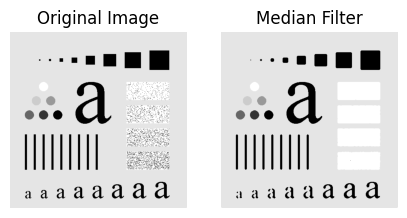

In [ ]:
filter_size = 5

rows, cols = img.shape
img1 = np.pad(img, pad_width=filter_size//2, mode='constant', constant_values=255)
filtered_img = np.zeros_like(img)
for row in range(rows):
    for col in range(cols):
        replace = np.median(img1[row:row+filter_size, col:col+filter_size])
        filtered_img[row,col]=  replace

plt.figure(figsize=(5, 3))
imShow("Original Image",img, subplot=True, row=1,col=2, num=1)
imShow("Median Filter",filtered_img,subplot=True, row=1, col=2, num=2)
plt.show()

## **Min Filter**

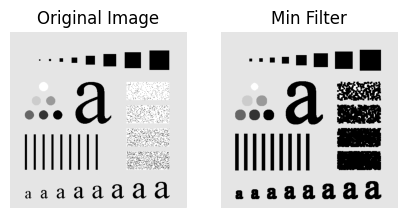

In [ ]:
filter_size = 5

rows, cols = img.shape
img1 = np.pad(img, pad_width=filter_size//2, mode='constant', constant_values=255)
filtered_img = np.zeros_like(img)
for row in range(rows):
    for col in range(cols):
        replace = np.min(img1[row:row+filter_size, col:col+filter_size])
        filtered_img[row,col]=  replace

plt.figure(figsize=(5, 3))
imShow("Original Image",img, subplot=True, row=1,col=2, num=1)
imShow("Min Filter",filtered_img,subplot=True, row=1,col=2, num=2)
plt.show()

## **Max Filter**

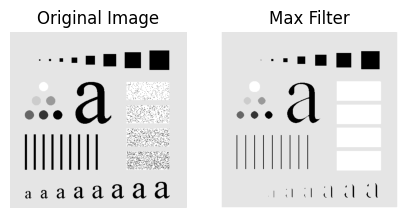

In [ ]:
filter_size = 5

rows, cols = img.shape
img1 = np.pad(img, pad_width=filter_size//2, mode='constant', constant_values=255)
filtered_img = np.zeros_like(img)
for row in range(rows):
    for col in range(cols):
        replace = np.max(img1[row:row+filter_size, col:col+filter_size])
        filtered_img[row,col]=  replace

plt.figure(figsize=(5, 3))
imShow("Original Image",img, subplot=True, row=1,col=2, num=1)
imShow("Max Filter",filtered_img,subplot=True, row=1,col=2, num=2)
plt.show()

# **Exp 6**

## **Point Detection**

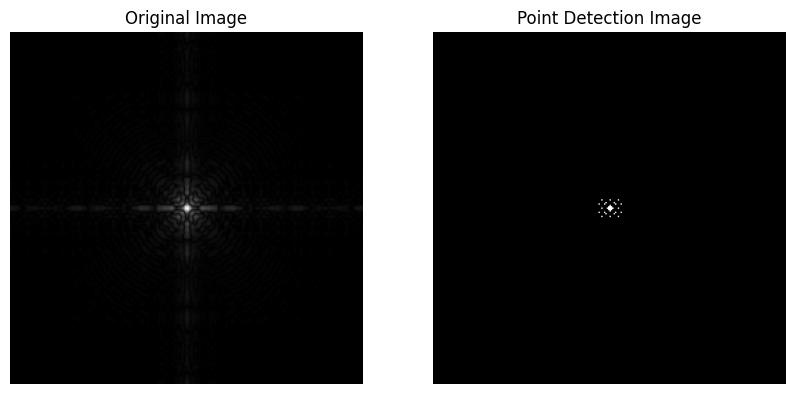

In [ ]:
T = 150
img = cv2.imread("/content/drive/MyDrive/dip_Images/Fig0305(a)(DFT_no_log).tif",0)
rows, cols = img.shape
img1 = np.pad(img, pad_width=1, mode='constant', constant_values=255)
filtered_img = np.zeros_like(img)
mask = np.array([[-1,-1,-1],
                 [-1, 8,-1],
                 [-1,-1,-1]])
for row in range(rows):
    for col in range(cols):
        replace = np.sum(img1[row:row+3, col:col+3] * mask)
        if replace > T:
            filtered_img[row,col]=  255
        else:
            filtered_img[row,col]=  0

plt.figure(figsize=(10, 8))
imShow("Original Image",img, subplot=True, row=1,col=2, num=1)
imShow("Point Detection Image",filtered_img,subplot=True, row=1, col=2, num=2)
plt.show()

## **Line Detection**

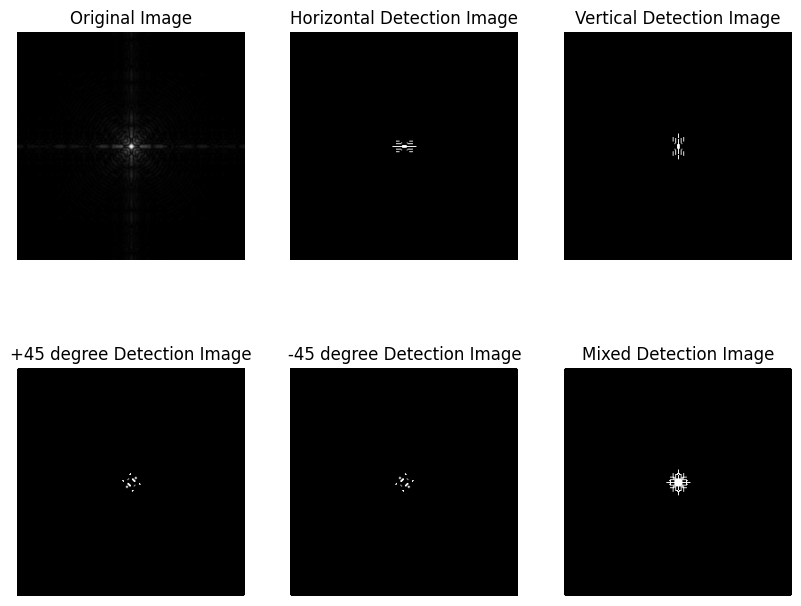

In [ ]:
T = 70

rows, cols = img.shape
img1 = np.pad(img, pad_width=1, mode='constant', constant_values=255)
filtered_img = np.zeros_like(img)

horizontal_mask = np.array([[-1,-1,-1],
                            [ 2, 2, 2],
                            [-1,-1,-1]])

vertical_mask = np.array([[-1, 2,-1],
                          [-1, 2,-1],
                          [-1, 2,-1]])
# +45*
deg45_mask = np.array([[-1,-1, 2],
                       [-1, 2,-1],
                       [ 2,-1,-1]])

# -45*
degn45_mask = np.array([[ 2,-1,-1],
                        [-1, 2,-1],
                        [-1,-1, 2]])
masks = [horizontal_mask, vertical_mask, deg45_mask, degn45_mask]
merged_img = np.zeros_like(img)
output  = []

for mask in masks:
    filtered_img = np.zeros_like(img)
    for row in range(rows):
        for col in range(cols):
            replace = np.sum(img1[row:row+3, col:col+3] * mask)
            if replace > T:
                filtered_img[row,col]=  255
                merged_img[row,col] = 255
            else:
                filtered_img[row,col] =  0
    output.append(filtered_img)

plt.figure(figsize=(10, 8))
imShow("Original Image",img, subplot=True, row=2,col=3, num=1)
imShow("Horizontal Detection Image",output[0],subplot=True, row=2, col=3, num=2)
imShow("Vertical Detection Image",output[1],subplot=True, row=2, col=3, num=3)
imShow("+45 degree Detection Image",output[2],subplot=True, row=2, col=3, num=4)
imShow("-45 degree Detection Image",output[3],subplot=True, row=2, col=3, num=5)
imShow("Mixed Detection Image",merged_img,subplot=True, row=2, col=3, num=6)
plt.show()

## **Global Thresholding**

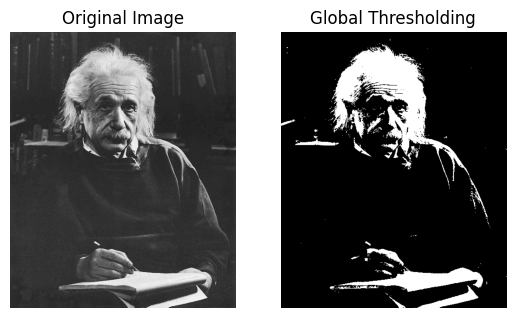

In [ ]:
img = cv2.imread('/content/drive/MyDrive/dip_Images/Fig0354(a)(einstein_orig).tif',0)
imShow("Original Image", image=img, subplot=True, row=1, col=2, num=1)
delta = 3
Tnew = np.min(img)+1
while abs(T-Tnew) >= delta:
    T = Tnew
    rows, cols = img.shape
    totalCells = rows*cols

    G1 = []
    G2 = []
    for row in range(rows):
        for col in range(cols):
            if img[row][col] > T:
                G1.append(img[row][col])
            else:
                G2.append(img[row][col])
    m1 = np.mean(G1)
    m2 = np.mean(G2)

    Tnew = (m1+m2)/2
for row in range(rows):
    for col in range(cols):
        if img[row][col] > T:
            img[row][col] = 255
        else:
            img[row][col] = 0
imShow("Global Thresholding",image=img, subplot=True, row=1, col=2, num=2)

# **Exp 7**

## **Robert Operator**

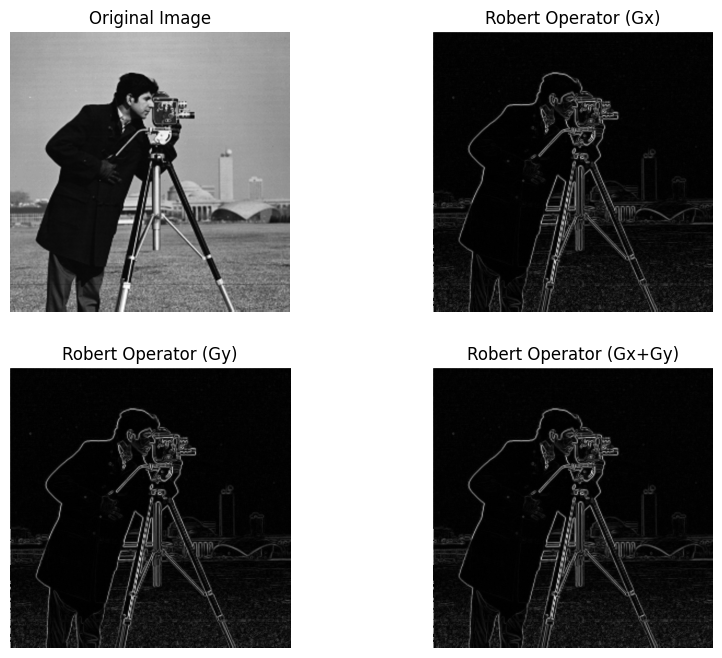

In [ ]:
img = cv2.imread("/content/cameraman.png",0)
rows, cols = img.shape
img1 = np.pad(img, pad_width=1, mode='constant', constant_values=0)

dGx = np.array([[ 1, 0],
                [ 0,-1]])
dGy = np.array([[ 0, 1],
                [-1, 0]])

Gx = np.zeros_like(img)
Gy = np.zeros_like(img)
robertImg = np.zeros_like(img)

for row in range(rows):
    for col in range(cols):
        r1 = np.sum(img1[row:row+2, col:col+2] * dGx)
        r2 = np.sum(img1[row:row+2, col:col+2] * dGy)
        robertImg[row][col] = abs(r1) + abs(r2)
        Gx[row][col] = r1
        Gy[row][col] = r2

plt.figure(figsize=(10, 8))
imShow("Original Image",img, subplot=True, row=2,col=2, num=1)
imShow("Robert Operator (Gx)", robertImg, subplot=True, row=2, col=2, num=2)
imShow("Robert Operator (Gy)", robertImg, subplot=True, row=2, col=2, num=3)
imShow("Robert Operator (Gx+Gy)", robertImg, subplot=True, row=2, col=2, num=4)
plt.show()

## **Prewitt Operator**

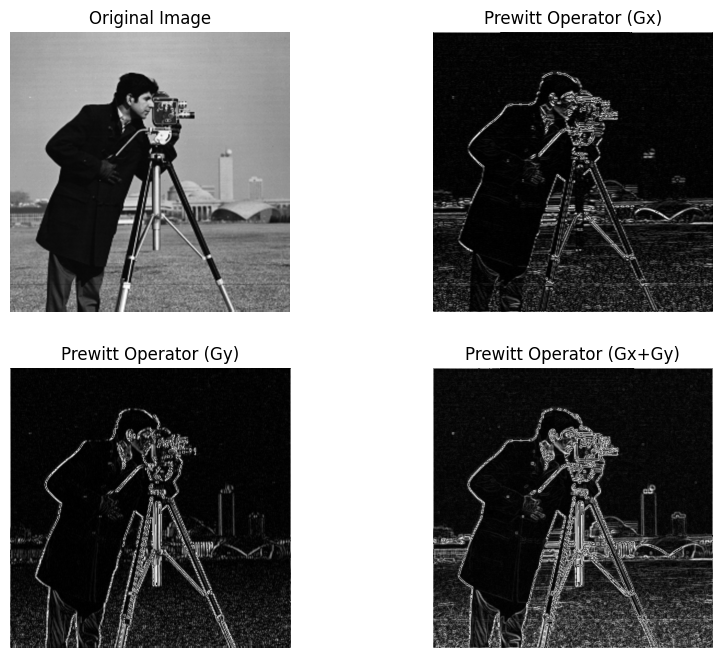

In [ ]:
rows, cols = img.shape
img1 = np.pad(img, pad_width=1, mode='constant', constant_values=0)

dGx = np.array([[-1,-1,-1],
                [ 0, 0, 0],
                [ 1, 1, 1]])
dGy = np.array([[-1, 0, 1],
                [-1, 0, 1],
                [-1, 0, 1]])

prewittImg = np.zeros_like(img)
Gx = np.zeros_like(img)
Gy = np.zeros_like(img)

for row in range(rows):
    for col in range(cols):
        r1 = np.sum(img1[row:row+3, col:col+3] * dGx)
        r2 = np.sum(img1[row:row+3, col:col+3] * dGy)
        prewittImg[row][col] = abs(r1) + abs(r2)
        Gx[row][col] = abs(r1)
        Gy[row][col] = abs(r2)

plt.figure(figsize=(10, 8))
imShow("Original Image",img, subplot=True, row=2,col=2, num=1)
imShow("Prewitt Operator (Gx)", Gx, subplot=True, row=2, col=2, num=2)
imShow("Prewitt Operator (Gy)", Gy, subplot=True, row=2, col=2, num=3)
imShow("Prewitt Operator (Gx+Gy)", prewittImg, subplot=True, row=2, col=2, num=4)
plt.show()

## **Sobel Operator**

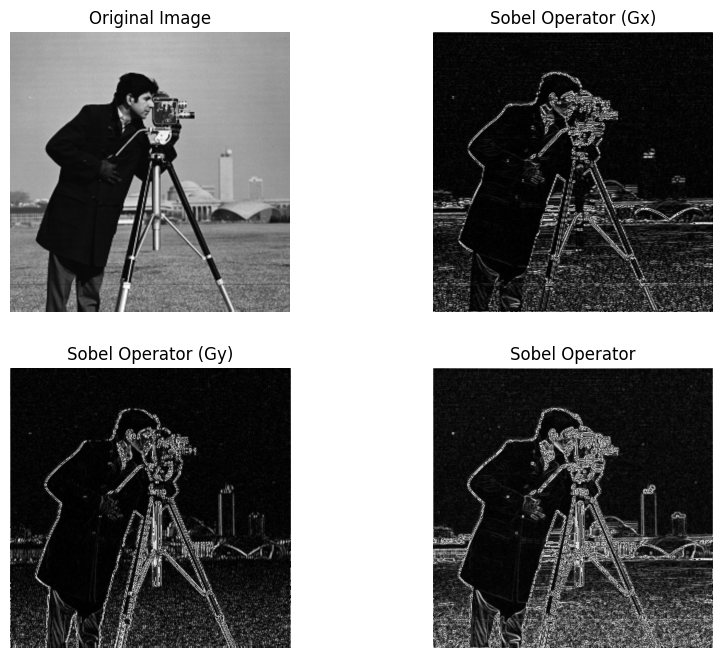

In [ ]:
rows, cols = img.shape
img1 = np.pad(img, pad_width=1, mode='constant', constant_values=0)

dGx = np.array([[-1,-2,-1],
                [ 0, 0, 0],
                [ 1, 2, 1]])
dGy = np.array([[-1, 0, 1],
                [-2, 0, 2],
                [-1, 0, 1]])
Gx = np.zeros_like(img)
Gy = np.zeros_like(img)
sobelImg = np.zeros_like(img)

for row in range(rows):
    for col in range(cols):
        r1 = np.sum(img1[row:row+3, col:col+3] * dGx)
        r2 = np.sum(img1[row:row+3, col:col+3] * dGy)
        sobelImg[row][col] = abs(r1) + abs(r2)
        Gx[row][col] = abs(r1)
        Gy[row][col] = abs(r2)

plt.figure(figsize=(10, 8))
imShow("Original Image",img, subplot=True, row=2,col=2, num=1)
imShow("Sobel Operator (Gx)", Gx, subplot=True, row=2, col=2, num=2)
imShow("Sobel Operator (Gy)", Gy, subplot=True, row=2, col=2, num=3)
imShow("Sobel Operator", sobelImg, subplot=True, row=2, col=2, num=4)
plt.show()

# **Exp 8**

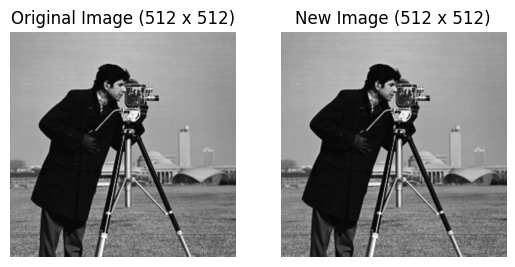

In [ ]:

img = cv2.imread("/content/cameraman.png",0)
height, width = img.shape
new_height = height - (height % 8)
new_width = width - (width % 8)
imShow(title=f"Original Image ({height} x {width})", image=img, subplot=True, row=1, col=2, num=1)
img = img[:new_height, :new_width]
imShow(title=f"New Image ({new_height} x {new_width})", image=img, subplot=True, row=1, col=2, num=2)

## **Method I**

### **DCT**

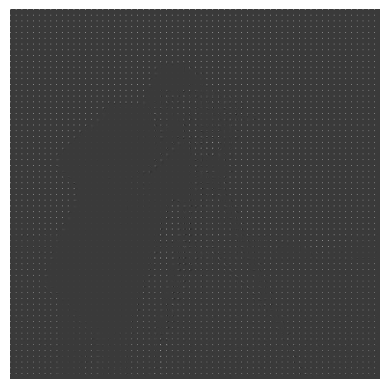

In [ ]:
N = 8
def dct2D(block, N = N):
    DCT_matrix = np.zeros((N, N))
    for u in range(N):
        for v in range(N):
            au = (1/(N))**0.5 if u == 0 else (2/(N))**0.5
            av = (1/(N))**0.5 if v == 0 else (2/(N))**0.5
            dct_sum = 0
            for x in range(N):
                for y in range(N):
                    dct_sum += block[x, y] * np.cos(((2 * x + 1) * u * np.pi) / (2 * N)) * np.cos(((2 * y + 1) * v * np.pi) / (2 * N))
            DCT_matrix[u, v] = au * av * dct_sum
    return DCT_matrix


blocks = [img[i:i+N, j:j+N] for i in range(0, new_height, N) for j in range(0, new_width, N)]


dct_blocks = [dct2D(block) for block in blocks]

new_img = np.zeros((new_height, new_width))
idx = 0
for i in range(0, new_height, N):
    for j in range(0, new_width, N):
        new_img[i:i+N, j:j+N] = dct_blocks[idx]
        idx += 1


new_img = np.round(new_img)

imShow(image=new_img)

### **IDCT**

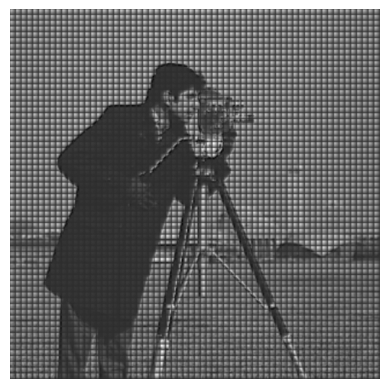

In [ ]:
def idct2D(block, N = N):
    IDCT_matrix = np.zeros((N, N))
    for u in range(N):
        for v in range(N):
            au = (1/(N))**0.5 if u == 0 else (2/(N))**0.5
            av = (1/(N))**0.5 if v == 0 else (2/(N))**0.5
            idct_sum = 0
            for x in range(N):
                for y in range(N):
                    idct_sum += block[x, y] * np.cos(((2 * x + 1) * u * np.pi) / (2 * N)) * np.cos(((2 * y + 1) * v * np.pi) / (2 * N))
            IDCT_matrix[u, v] = au * av * idct_sum
    return IDCT_matrix


blocks = [new_img[i:i+N, j:j+N] for i in range(0, new_height, N) for j in range(0, new_width, N)]

idct_blocks = [dct2D(block) for block in blocks]

og_img = np.zeros((new_height, new_width))
idx = 0
for i in range(0, new_height, N):
    for j in range(0, new_width, N):
        og_img[i:i+N, j:j+N] = idct_blocks[idx]
        idx += 1


og_img = np.round(og_img)

imShow(image=og_img)

In [ ]:
thresh = 0.1
img_thresh = new_img * (np.absolute(new_img) > thresh*np.max(np.absolute(new_img)))
frac_nonzero = np.sum(img_thresh != 0.0)/img.size
print("Keeping %.2f%% of DCT coefficients"%(100*frac_nonzero))
print('Compression ratio: %.1f:1'%(1/frac_nonzero))

MSE = np.sum((img-og_img)**2)/img.size
PSNR = 10*np.log10(np.max(img)**2/MSE)
print(f'PSNR: {round(PSNR)} db')

Keeping 1.53% of DCT coefficients
Compression ratio: 65.4:1
PSNR: 12 db


## **Method II**

### **DCT**

In [ ]:
img = cv2.imread("/content/cameraman.png", 0)
dct_img = cv2.dct(cv2.dct(np.float32(img)))

### **IDCT**

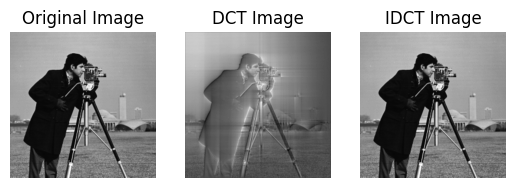

In [ ]:
idct_img = cv2.idct(cv2.idct(np.float32(dct_img)))
imShow("Original Image", img, subplot=True, row=1, col=3, num=1)
imShow("DCT Image", dct_img, subplot=True, row=1, col=3, num=2)
imShow("IDCT Image", idct_img, subplot=True, row=1, col=3, num=3)


# **Exp 9**

## **Huffman**

### **Method  I**

In [ ]:
import math
import cv2

# Image to hashmap
img = cv2.imread("/content/drive/MyDrive/dip_Images/Fig0308(a)(fractured_spine).tif", 0)

hashmap = dict()

rows, cols = img.shape
for row in range(rows):
    for col in range(cols):
        pixel = img[row][col]
        if pixel not in hashmap:
            hashmap[pixel] = 1
        else:
            hashmap[pixel] += 1


class Node:
    def __init__(self):
        self.left = None
        self.right = None
        self.parent = None
        self.nodes = []

freq_node = {}
for pixel in hashmap:
    n = Node()
    n.nodes.append(pixel)
    freq_node[n] = [hashmap[pixel],0]


def get_smallest():
    sorted_dict = sorted(freq_node.items(), key=lambda x: (x[1][0], -x[1][1]))

    return sorted_dict[:2]

while len(freq_node)!=1:
    ns1, ns2 = get_smallest()
    n1 = list(ns1)[0]
    n2 = list(ns2)[0]
    v1 = list(ns1)[1][0]
    v2 = list(ns2)[1][0]
    n = Node()
    n.left = n1
    n.right = n2
    n1.parent = n
    n2.parent = n
    n.nodes.extend(n1.nodes)
    n.nodes.extend(n2.nodes)
    del freq_node[n1]
    del freq_node[n2]
    freq_node[n] = [v1+v2, len(n.nodes)]

huffman_codes = {}
for char in hashmap.keys():
    code = ""
    temp = n
    while temp.left or temp.right:
        if char in temp.left.nodes:
            code += "0"

            temp = temp.left
        else:

            temp = temp.right
            code += "1"
    huffman_codes[char] = code
    print(char, "->", code)


def calculate_metrics(hashmap, huffman_codes):
    freq = [hashmap[pixel] for pixel in hashmap]
    total = sum(freq)
    prob = [f/total for f in freq]
    len_codes = [len(code) for code in huffman_codes.values()]
    Lavg = 0
    for i in range(len(prob)):
        Lavg += prob[i]*len_codes[i]
    print("--------------------")
    print("Average CodeWord Length: ", Lavg)

    entropy = 0
    for p in prob:
        entropy -= p*math.log2(p)

    print("Entropy: ", entropy)
    print("Efficiency: ", entropy*100/Lavg, "%")
    print("Redundancy:", 1-entropy/Lavg)


0 -> 010101
1 -> 1
2 -> 011011
3 -> 010010
4 -> 0111101
5 -> 0110100
7 -> 0101100
8 -> 0111100
9 -> 0101000
10 -> 0100110
13 -> 01100110
16 -> 01110001
17 -> 01110101
14 -> 0011101
12 -> 0011111
6 -> 001001
15 -> 01111100
20 -> 0000100
40 -> 0011000
54 -> 010000011
50 -> 011100000
41 -> 011111110
39 -> 01000000
42 -> 011101000
37 -> 01000111
27 -> 0010000
19 -> 01101010
11 -> 01110011
24 -> 011111111
29 -> 0000111
35 -> 0010110
43 -> 00110010
34 -> 00000010
47 -> 010111101
77 -> 001111010
104 -> 001101001
109 -> 010100111
123 -> 0111111001
134 -> 0111011000
114 -> 010000101
74 -> 000000111
48 -> 011101001
52 -> 010001101
56 -> 000011010
53 -> 011001110
55 -> 010100101
60 -> 001010110
102 -> 001111011
129 -> 0111001011
136 -> 001101000
131 -> 010001100
118 -> 010000110
81 -> 001000100
32 -> 0000010
58 -> 010111000
63 -> 010110111
69 -> 010110101
87 -> 011000110
151 -> 001101101
162 -> 000000000
142 -> 0111011001
90 -> 011000111
157 -> 001010111
255 -> 0001
197 -> 0110010111
33 -> 010001

In [ ]:
calculate_metrics(hashmap, huffman_codes)

--------------------
Average CodeWord Length:  3.8945029226915135
Entropy:  3.8706645133745625
Efficiency:  99.38789597054722 %
Redundancy: 0.0061210402945277576


### **Method II**

#### **Note**: I am not sure if this method is allowed or Not if possible get it confirmed from College Faculty

In [ ]:
import cv2
import huffman
import math


img = cv2.imread("/content/drive/MyDrive/dip_Images/Fig0308(a)(fractured_spine).tif", 0)

hashmap = dict()

rows, cols = img.shape
for row in range(rows):
    for col in range(cols):
        pixel = img[row][col]
        if pixel not in hashmap:
            hashmap[pixel] = 1
        else:
            hashmap[pixel] += 1



symbol_freq_pairs = [(key, value) for key, value in hashmap.items()]


codebook = huffman.codebook(symbol_freq_pairs)


print("Huffman Codes:")
for symbol, code in codebook.items():
    print(f"Symbol: {symbol}, Code: {code}")


total_frequency = sum(freq for _, freq in symbol_freq_pairs)
ent = sum(-p * math.log2(p) for _, p in ((symbol, freq / total_frequency) for symbol, freq in symbol_freq_pairs if freq))
print("\nEntropy:", ent)


avg_len = sum(len(code) * (freq / total_frequency) for symbol, freq in symbol_freq_pairs for code in [codebook[symbol]])
print("Average Codeword Length:", avg_len)


eff = ent / avg_len
print("Efficiency:", eff*100,"%")


Huffman Codes:
Symbol: 0, Code: 010101
Symbol: 1, Code: 1
Symbol: 2, Code: 011011
Symbol: 3, Code: 010010
Symbol: 4, Code: 0111101
Symbol: 5, Code: 0110100
Symbol: 7, Code: 0101100
Symbol: 8, Code: 0111100
Symbol: 9, Code: 0101000
Symbol: 10, Code: 0100110
Symbol: 13, Code: 01100110
Symbol: 16, Code: 01110001
Symbol: 17, Code: 01110101
Symbol: 14, Code: 0011101
Symbol: 12, Code: 0011111
Symbol: 6, Code: 001001
Symbol: 15, Code: 01111100
Symbol: 20, Code: 0000100
Symbol: 40, Code: 0011000
Symbol: 54, Code: 010000011
Symbol: 50, Code: 011100000
Symbol: 41, Code: 011111110
Symbol: 39, Code: 00111101
Symbol: 42, Code: 011101000
Symbol: 37, Code: 01000111
Symbol: 27, Code: 0010000
Symbol: 19, Code: 01101010
Symbol: 11, Code: 01110011
Symbol: 24, Code: 011111111
Symbol: 29, Code: 0000111
Symbol: 35, Code: 0010110
Symbol: 43, Code: 00110010
Symbol: 34, Code: 00000010
Symbol: 47, Code: 010111101
Symbol: 77, Code: 010000001
Symbol: 104, Code: 001101001
Symbol: 109, Code: 010100111
Symbol: 123, 